## Get Familiar with ML Basics in a Kaggle Competition: Titanic

<img src="./images/titanic.jpg" width="800" style="float:left"/>

## 📌 Task 1: Getting Started with Kaggle
    Creating your account and joining the competition
---
- Create your kaggle account and join the [**Titanic: Machine Learning from Disaster**](https://www.kaggle.com/c/titanic).
- Read the description and most important informations about the competition. 
- Download the entire dataset on the platform.
Now let's start our project! Let's dive in! 

## 📌 Task 2: Exploratory Data Analysis (EDA)
    Start working on your dataset. Import necessary libraries and and make an exploratory data analysis using pandas profilling and seaborn.


### Importing Libraries
---
Import the most important libraries you will be using initially.

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import warnings
warnings.filterwarnings('ignore')

#%matplotlib inline
#pip install pandas-profiling

### Import the dataset
---

In [4]:
test_data = pd.read_csv('data/test.csv')
train_data = pd.read_csv('data/train.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
print('Number of Training = {}'.format(train_data.shape[0]))
print('Number of Test = {}\n'.format(test_data.shape[0]))

#target columns
train_data.columns

Number of Training = 891
Number of Test = 418



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Data visualization
---


In [7]:
#Pandas Profiling Report
report = pp.ProfileReport(train_data)
display

<function IPython.core.display.display(*objs, include=None, exclude=None, metadata=None, transient=None, display_id=None, **kwargs)>

**Variable Notes**

_pclass_: A proxy for socio-economic status (SES)
- _1st_ = Upper
- _2nd_ = Middle
- _3rd_ = Lower

_age_: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

_sibsp_: The dataset defines family relations in this way...
- _Sibling_ = brother, sister, stepbrother, stepsister
- _Spouse_ = husband, wife (mistresses and fiancés were ignored)

_parch_: The dataset defines family relations in this way...
- _Parent_ = mother, father
- _Child_ = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

**Export your report**

In [8]:
# The following command will export your previous report into a html file. 
report.to_file(output_file='dataframe_titanic_report.html')

## 📌 Task 3: Preprocessing I
    Taking care of Missing Values
---

**Important:** Missing data is information that is missing from a database and could be important for the result of an analysis. Working with a dataset with missing values is a problem of great relevance at the time of data analysis and can originate from different sources, such as failures in the collection system, problems with the integration of different sources, etc., the point is: we must be careful to avoid bias in the results we seek.

In [9]:
train_data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Sage, Miss. Constance Gladys",male,NaN,NaN,NaN,CA. 2343,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


After visualized our entire dataset, **check the describe above or the Sample in our dataframe report**, you see that there are certain data points labeled with a `NaN`. These denote missing values. Different datasets encode missing values in different ways. Sometimes it may be a `9999`, other times a`0` - because real world data can be very messy!


**The goal here is to figure out how best to process the data so our machine learning model can learn from it.**

### Preprocessing
---




**Look at numeric and categorical values separately:**

Numerical Features: Age, Fare, SibSp, Parch.

Categorical Features: Survived, Sex, Embarked, Pclass.

Alphanumeric Features (but categorical): Ticket, Cabin.

In our overview report, click on the tab "Warnings": 

- Tickets and Cabin are features with a high cardinality, and a lot of distinc values. 
- Age and Cabin has a lot of missing values.
- Name and ID has unique values.
- SibSp, Parch and Fare has a lot of zeros. 

In [10]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**How many people survived?**

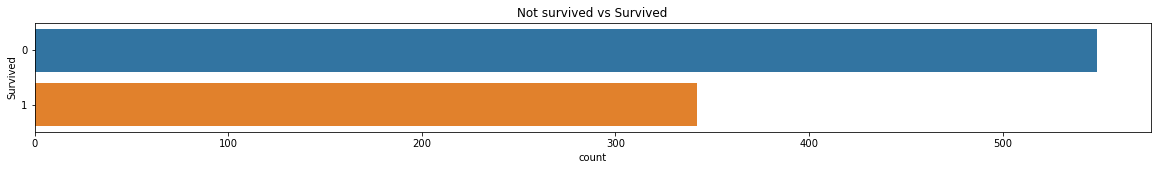

In [11]:
plt.figure(figsize=(20,2))
sns.countplot(y='Survived', data=train_data)
plt.title("Not survived vs Survived")
plt.show()

--- 
**Feature Name**

In [12]:
train_data = train_data.drop(['Name'], axis=1)
test_data = test_data.drop(['Name'], axis=1)

---
**Feature Age**

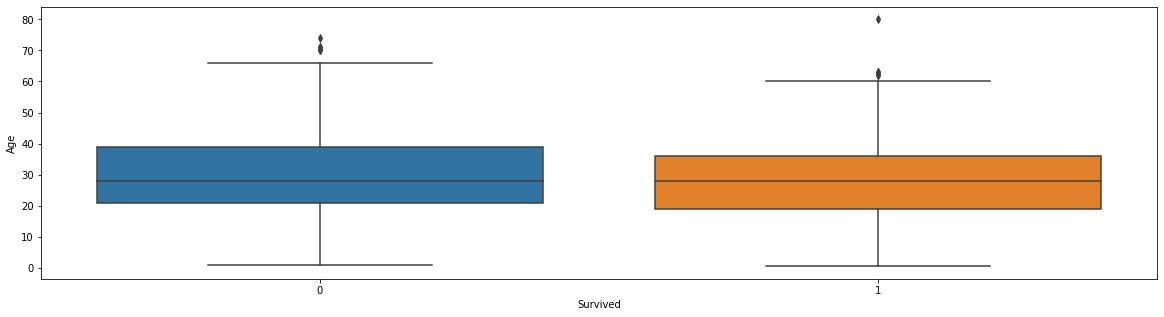

In [13]:
#plot some info about age and survived people
plt.figure(figsize=(20,5))
sns.boxplot(x='Survived', y='Age', data=train_data)

---
**Feature Ticket**

In [14]:
#feature ticket : Too many missing values, we won't move forward
train_data = train_data.drop(['Ticket'], axis=1)
test_data = test_data.drop(['Ticket'], axis=1)

--- 
**Feature Cabin**

In [15]:
train_data = train_data.drop(['Cabin'], axis=1)
test_data = test_data.drop(['Cabin'], axis=1)

## 📌 Task 4: Preprocessing II
    Taking care of Missing Values
---
**Feature Embarked**

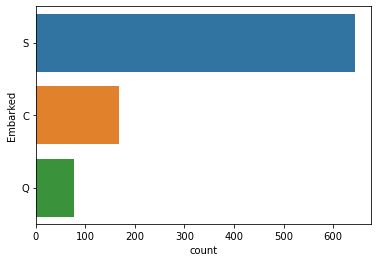

In [16]:
sns.countplot(y="Embarked", data=train_data)

In [17]:
#we have 2 missing values in the Embarked feature. We will drop these 2 missing values only
train_data = train_data.dropna(subset=["Embarked"])

---
**Feature Sex**

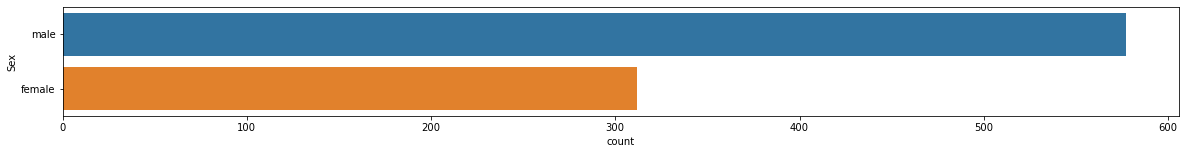

In [18]:
#Let's vview the distribution of sex in out dataset
plt.figure(figsize=(20,2))
sns.countplot(y='Sex', data=train_data)

In [19]:
#import numpy as np
train_data['Sex'] = np.where(train_data['Sex'] == 'female', 1,0)
test_data['Sex'] = np.where(test_data['Sex'] == 'female', 1,0)

In [20]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,0,22.0,1,0,7.2500,S
1,2,1,1,1,38.0,1,0,71.2833,C
2,3,1,3,1,26.0,0,0,7.9250,S
3,4,1,1,1,35.0,1,0,53.1000,S
4,5,0,3,0,35.0,0,0,8.0500,S


In [21]:
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,0,34.5,0,0,7.8292,Q
1,893,3,1,47.0,1,0,7.0000,S
2,894,2,0,62.0,0,0,9.6875,Q
3,895,3,0,27.0,0,0,8.6625,S
4,896,3,1,22.0,1,1,12.2875,S


## 📌 Task 5: Preprocessing III
    Encoding Categorical Data
---

### Feature Encoding

Documentation: [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html)

- Why we need to encode our categorial data?
- PCLASS : 1,2, and 3

**Train Dataset**

In [22]:
#Get dummies - Embarked, Sex, Pclass
#Encoding the categorial features
embarked_oh = pd.get_dummies(train_data['Embarked'], prefix='embarked')
sex_oh = pd.get_dummies(train_data['Sex'], prefix='sex')
pclass_oh = pd.get_dummies(train_data['Pclass'], prefix='pclass')

In [23]:
#Combine the encoded columns
df_encoded = pd.concat([train_data, embarked_oh, sex_oh, pclass_oh], axis=1)
df_encoded.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,3,0,22.0,1,0,7.2500,S,0,0,1,1,0,0,0,1
1,2,1,1,1,38.0,1,0,71.2833,C,1,0,0,0,1,1,0,0
2,3,1,3,1,26.0,0,0,7.9250,S,0,0,1,0,1,0,0,1
3,4,1,1,1,35.0,1,0,53.1000,S,0,0,1,0,1,1,0,0
4,5,0,3,0,35.0,0,0,8.0500,S,0,0,1,1,0,0,0,1


In [24]:
#Drop the original categorial features
df_encoded = df_encoded.drop(['Pclass', 'Sex', 'Embarked'], axis = 1)
df_encoded.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,1,0,22.0,1,0,7.2500,0,0,1,1,0,0,0,1
1,2,1,38.0,1,0,71.2833,1,0,0,0,1,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,1,1,0,0
4,5,0,35.0,0,0,8.0500,0,0,1,1,0,0,0,1


---

**Test Dataset**

In [25]:
#Encoding the categorial values
test_embarked_oh = pd.get_dummies(test_data['Embarked'], prefix='embarked')
test_sex_oh = pd.get_dummies(test_data['Sex'], prefix='sex')
test_pclass_oh = pd.get_dummies(test_data['Pclass'], prefix='pclass')


In [26]:
#Combine the encoded columns
test_data = pd.concat([test_data, test_embarked_oh, test_sex_oh, test_pclass_oh], axis=1)
test_data.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,892,3,0,34.5,0,0,7.8292,Q,0,1,0,1,0,0,0,1
1,893,3,1,47.0,1,0,7.0000,S,0,0,1,0,1,0,0,1
2,894,2,0,62.0,0,0,9.6875,Q,0,1,0,1,0,0,1,0
3,895,3,0,27.0,0,0,8.6625,S,0,0,1,1,0,0,0,1
4,896,3,1,22.0,1,1,12.2875,S,0,0,1,0,1,0,0,1


In [27]:
#Drop the original categorial values
test_data= test_data.drop(['Pclass', 'Sex', 'Embarked'], axis=1)
test_data.head()

,PassengerId,Age,SibSp,Parch,Fare,embarked_C,embarked_Q,embarked_S,sex_0,sex_1,pclass_1,pclass_2,pclass_3
0,892,34.5,0,0,7.8292,0,1,0,1,0,0,0,1
1,893,47.0,1,0,7.0000,0,0,1,0,1,0,0,1
2,894,62.0,0,0,9.6875,0,1,0,1,0,0,1,0
3,895,27.0,0,0,8.6625,0,0,1,1,0,0,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1,0,0,1


## 📌 Task 6: Split the Train & Test datasets
---

Split the dataset into training and testing is very common, and you will do it on countless occasions. Even though in this current problem, we have our training and test csv separately, we will use this technique in our training dataset, so we can get used to it.

**train_test_split**: The first argument will be the `feature data`, the second the `target or labels`. The `test_size` keyword argument specifies what proportion of the original data is used for the test set. Lastly, the `random_state` kward sets a seed for the random number generator that splits the data into trains and test.

Splitting the Training Data we will use part of our training data (30% in this case) to test the accuracy of our different models.

In [29]:
from sklearn.model_selection import train_test_split

#df_encoded -> this is our train dataset encoded and preprocessed

y = df_encoded['Survived'] #target
x = df_encoded.drop(['Survived', 'PassengerId'], axis=1) #train predictions

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, random_state=21, stratify=y )

In [30]:
x.shape

(889, 12)

In [31]:
y.shape

(889,)

## 📌 Task 7: Building our Machine Learning Models
---


**Logistic Regression**

Logistic regression measures the relationship between the categorical dependent variable _(feature)_ and one or more independent variables _(features)_ by estimating probabilities using a logistic function, which is the cumulative distribution function of logistic distribution. 

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
#train features
logreg.fit(x_train, y_train)

#unseed data
y_pred = logreg.predict(x_val)

acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
acc_logreg

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

**Decision Tree**

Decision tree learning is one of the predictive modelling approaches used in statistics, data mining and machine learning. It uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Decision trees are among the most popular machine learning algorithms given their intelligibility and simplicity

Reference: [Wikipedia](https://en.wikipedia.org/wiki/Decision_tree_learning)

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(x_train, y_train)

y_pred = dt.predict(x_val)

acc_dt = round(accuracy_score(y_predict, y_val) *100, 2)
acc_dt

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

### Aditional Models
---


If you want to test other models, and compare their performance with the two we already use. Below you find these models already declared. Feel free to also test them. Chance the cell type, `raw` for `code`, and run to see the results. 

In [38]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
acc_rf = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Random Forest Accuracy",acc_rf)


#KNN | K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print("K-Nearest Neighbors Accuracy",acc_knn)


# Support Vector Machine
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print("Support Vector Machine", acc_svc)

NameError: name 'X_train' is not defined

## 📌 Task 8: Submit your project on Kaggle
---

Now, we finish our model evaluate, it's time to create a submission.csv file to upload to the Kaggle competition!

### Predictions and submission file

### Tips and Resources: 

- [Seaborn: Statistical Data Visualization](https://seaborn.pydata.org/index.html)

- Resources that may be insterested take a look: [Titanic - A Data Science Approach](https://www.kaggle.com/pedrodematos/titanic-a-complete-data-science-approach)

- This complete notebook, you will find in my github account, if you want make improvements, feel free to do that and share with me. 
[Project on Github](https://github.com/mirianfsilva/titanic-kaggle-competition)

- Keep praticing on Kaggle! 

- It's important that you improve your theorical backgroung too, undestanding what's every model does in the background. So I also recommend this Coursera Course, it's a good complement for your practices: [Machine Learning by Stanford University](https://www.coursera.org/learn/machine-learning)